<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2.4'

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n120.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,77.776728,37.529117,48.051014,32.684193,206.041052,181.109019,24.932033
1,0.0,1.0,23.892024,34.354761,28.263311,-34.942409,61.567687,109.690059,-48.122372
2,0.0,2.0,97.888426,53.223987,43.496415,-215.215184,-10.606356,225.601729,-236.208085
3,0.0,3.0,25.755264,51.483301,70.060304,129.827282,287.126151,163.093150,124.033001
4,0.0,4.0,24.991444,77.342211,50.905226,-456.228632,-292.989751,195.252637,-488.242388
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,85.192088,42.607381,32.814419,203.430520,374.044409,166.379772,207.664637
119996,999.0,116.0,93.834757,98.276745,55.844312,39.207676,297.163490,264.358737,32.804752
119997,999.0,117.0,31.901727,86.562183,53.941309,25.834758,208.239977,184.782926,23.457051
119998,999.0,118.0,97.676397,47.720973,32.768315,0.569422,188.735108,184.576499,4.158609


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    77.776728  37.529117  48.051014   32.684193  206.041052   
      1.0    23.892024  34.354761  28.263311  -34.942409   61.567687   
      2.0    97.888426  53.223987  43.496415 -215.215184  -10.606356   
      3.0    25.755264  51.483301  70.060304  129.827282  287.126151   
      4.0    24.991444  77.342211  50.905226 -456.228632 -292.989751   
...                ...        ...        ...         ...         ...   
999.0 115.0  85.192088  42.607381  32.814419  203.430520  374.044409   
      116.0  93.834757  98.276745  55.844312   39.207676  297.163490   
      117.0  31.901727  86.562183  53.941309   25.834758  208.239977   
      118.0  97.676397  47.720973  32.768315    0.569422  188.735108   
      119.0  64.807809  29.309275  68.731886   54.329868  227.178837   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    181.109019   24.932033  
      1.0    109.690059  -48.122372  
      2.0    225.601729 -236.208085  
      3.0    163.093150  124.033001  
      4.0    195.252637 -488.242388  
...                 ...         ...  
999.0 115.0  166.379772  207.664637  
      116.0  264.358737   32.804752  
      117.0  184.782926   23.457051  
      118.0  184.576499    4.158609  
      119.0  182.859183   44.319654  

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    77.776728  37.529117  48.051014   32.684193  206.041052   
      1.0    23.892024  34.354761  28.263311  -34.942409   61.567687   
      2.0    97.888426  53.223987  43.496415 -215.215184  -10.606356   
      3.0    25.755264  51.483301  70.060304  129.827282  287.126151   
      4.0    24.991444  77.342211  50.905226 -456.228632 -292.989751   
...                ...        ...        ...         ...         ...   
999.0 115.0  85.192088  42.607381  32.814419  203.430520  374.044409   
      116.0  93.834757  98.276745  55.844312   39.207676  297.163490   
      117.0  31.901727  86.562183  53.941309   25.834758  208.239977   
      118.0  97.676397  47.720973  32.768315    0.569422  188.735108   
      119.0  64.807809  29.309275  68.731886   54.329868  227.178837   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    181.109019   24.932033  
      1.0    109.690059  -48.122372  
      2.0    225.601729 -236.208085  
      3.0    163.093150  124.033001  
      4.0    195.252637 -488.242388  
...                 ...         ...  
999.0 115.0  166.379772  207.664637  
      116.0  264.358737   32.804752  
      117.0  184.782926   23.457051  
      118.0  184.576499    4.158609  
      119.0  182.859183   44.319654  

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,77.776728,37.529117,48.051014,32.684193,206.041052,181.109019,24.932033
1,0.0,1.0,23.892024,34.354761,28.263311,-34.942409,61.567687,109.690059,-48.122372
2,0.0,2.0,97.888426,53.223987,43.496415,-215.215184,-10.606356,225.601729,-236.208085
3,0.0,3.0,25.755264,51.483301,70.060304,129.827282,287.126151,163.093150,124.033001
4,0.0,4.0,24.991444,77.342211,50.905226,-456.228632,-292.989751,195.252637,-488.242388
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,85.192088,42.607381,32.814419,203.430520,374.044409,166.379772,207.664637
119996,999.0,116.0,93.834757,98.276745,55.844312,39.207676,297.163490,264.358737,32.804752
119997,999.0,117.0,31.901727,86.562183,53.941309,25.834758,208.239977,184.782926,23.457051
119998,999.0,118.0,97.676397,47.720973,32.768315,0.569422,188.735108,184.576499,4.158609


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    77.776728  37.529117  48.051014   32.684193  206.041052   
      1.0    23.892024  34.354761  28.263311  -34.942409   61.567687   
      2.0    97.888426  53.223987  43.496415 -215.215184  -10.606356   
      3.0    25.755264  51.483301  70.060304  129.827282  287.126151   
      4.0    24.991444  77.342211  50.905226 -456.228632 -292.989751   
...                ...        ...        ...         ...         ...   
999.0 115.0  85.192088  42.607381  32.814419  203.430520  374.044409   
      116.0  93.834757  98.276745  55.844312   39.207676  297.163490   
      117.0  31.901727  86.562183  53.941309   25.834758  208.239977   
      118.0  97.676397  47.720973  32.768315    0.569422  188.735108   
      119.0  64.807809  29.309275  68.731886   54.329868  227.178837   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    181.109019   24.932033  
      1.0    109.690059  -48.122372  
      2.0    225.601729 -236.208085  
      3.0    163.093150  124.033001  
      4.0    195.252637 -488.242388  
...                 ...         ...  
999.0 115.0  166.379772  207.664637  
      116.0  264.358737   32.804752  
      117.0  184.782926   23.457051  
      118.0  184.576499    4.158609  
      119.0  182.859183   44.319654  

[120000 rows x 7 columns]

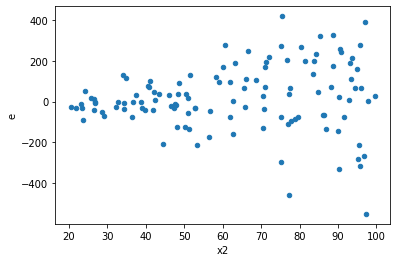

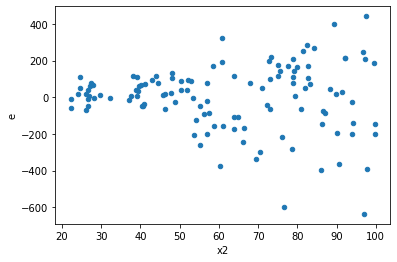

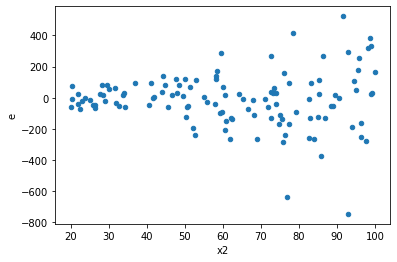

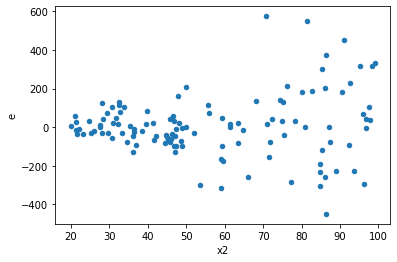

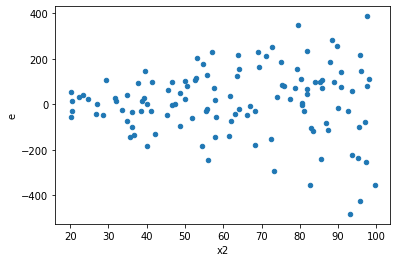

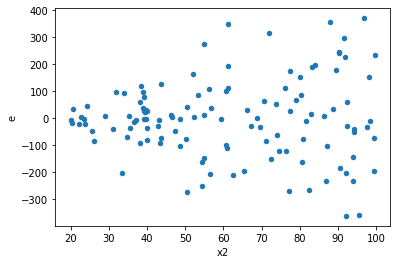

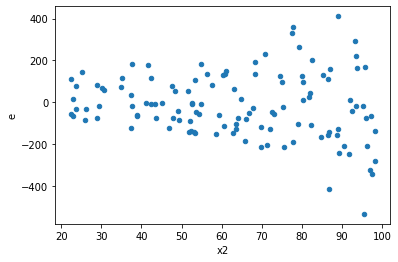

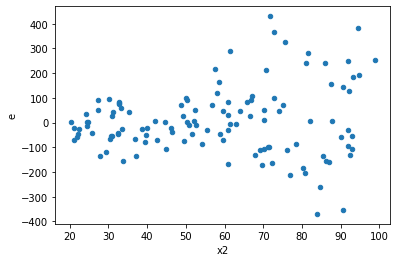

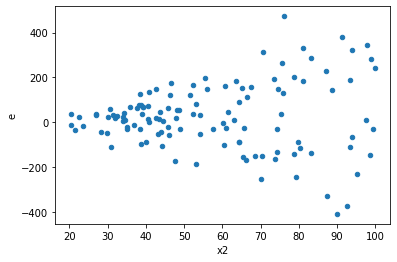

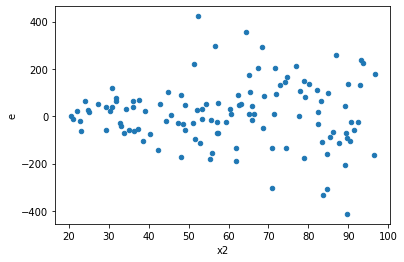

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,52.0,62.0,579767.8252104147,2358541.8960118257,11149.381254046437,38040.99832277138,3.4119380668739074,5.470338749313797e-06,0.9999972648306253,2.7351693746568984e-06,Reject001=0 : Heteroscedasticity
2.0,53.0,61.0,832004.79580409,2715244.5354662007,15698.203694416792,44512.20549944591,2.8354967463746874,0.00010649510708482524,0.9999467524464576,5.324755354241262e-05,Reject001=0 : Heteroscedasticity
3.0,61.0,53.0,357593.2456545788,2594347.0052004224,5862.1843549930945,48949.94349434759,8.350120113956269,5.637712519046545e-13,0.9999999999997181,2.8188562595232725e-13,Reject001=0 : Heteroscedasticity
5.0,55.0,59.0,427963.44406846253,2001759.1443235348,7781.1535285175005,33928.121090229404,4.36029452007144,8.649311022956852e-08,0.9999999567534449,4.324655511478426e-08,Reject001=0 : Heteroscedasticity
9.0,48.0,66.0,427464.12758730707,1525643.6112582046,8905.502658068897,23115.81229179098,2.5956774344283335,0.0003478536427661272,0.9998260731786169,0.0001739268213830636,Reject001=0 : Heteroscedasticity
10.0,51.0,63.0,586023.9152130495,2168249.7216129177,11490.665004177441,34416.66224782409,2.995184546352355,4.355436116787459e-05,0.9999782228194161,2.1777180583937295e-05,Reject001=0 : Heteroscedasticity
11.0,52.0,62.0,437043.0499423398,1997148.4988702363,8404.674037352688,32212.072562423167,3.832637936850833,7.20128823905597e-07,0.999999639935588,3.600644119527985e-07,Reject001=0 : Heteroscedasticity
13.0,66.0,48.0,667714.1052739396,1465260.701336299,10116.880382938478,30526.264611172897,3.0173594483388024,0.0001029961929850387,0.9999485019035075,5.149809649251935e-05,Reject001=0 : Heteroscedasticity
15.0,59.0,55.0,859260.231916218,1588200.8138115518,14563.732744342677,28876.378432937305,1.9827594298689954,0.011286610891944937,0.9943566945540275,0.0056433054459724685,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,52.0,62.0,579767.8252104147,2358541.8960118257,11149.381254046437,38040.99832277138,3.4119380668739074,5.470338749313797e-06,Reject001=0 : Heteroscedasticity
1.0,53.0,61.0,1508648.8215388893,1729819.3213647676,28465.072104507344,28357.693792865044,0.9962277168577663,0.9936642510232485,Reject001=1 : Homoscedasticity
2.0,53.0,61.0,832004.79580409,2715244.5354662007,15698.203694416792,44512.20549944591,2.8354967463746874,0.00010649510708482524,Reject001=0 : Heteroscedasticity
3.0,61.0,53.0,357593.2456545788,2594347.0052004224,5862.1843549930945,48949.94349434759,8.350120113956269,5.637712519046545e-13,Reject001=0 : Heteroscedasticity
4.0,68.0,46.0,1998533.563745105,611658.9482977034,29390.19946683978,13296.933658645727,0.4524274724180869,0.0028885084817443078,Reject001=0 : Heteroscedasticity
5.0,55.0,59.0,427963.44406846253,2001759.1443235348,7781.1535285175005,33928.121090229404,4.36029452007144,8.649311022956852e-08,Reject001=0 : Heteroscedasticity
6.0,53.0,61.0,1210532.4835170265,1285280.192883193,22840.235538057103,21070.167096445788,0.9225021809139414,0.7673294566800898,Reject001=1 : Homoscedasticity
7.0,62.0,52.0,1748658.6199457466,223863.9750144078,28204.171289447528,4305.076442584766,0.15263970702785698,1.2832980679504335e-11,Reject001=0 : Heteroscedasticity
8.0,55.0,59.0,2073158.8703518384,427490.9468472765,37693.7976427607,7245.6092685979065,0.19222285154887983,5.280816578951852e-09,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      507
Reject001=0 : Heteroscedasticity    493
Name: Result_test, dtype: int64